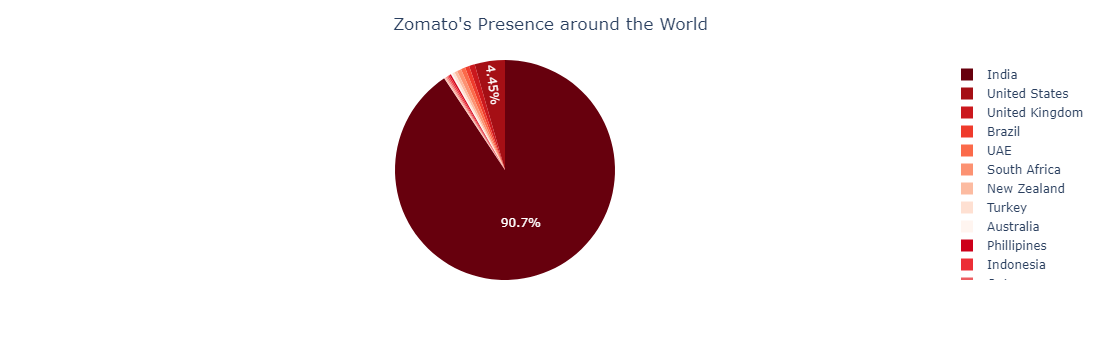

In [2]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import seaborn as sns

df=pd.read_csv('https://confrecordings.ams3.cdn.digitaloceanspaces.com/expert3chap3%2Fzomato_data1.csv')
df.drop(df.columns[[0,1]], axis=1, inplace=True)
df.head()

country_wise_df = (df['Country'].value_counts())
pie_country_wise = px.pie(country_wise_df, values=country_wise_df.values, names=country_wise_df.index, color_discrete_sequence=px.colors.sequential.Reds_r)
pie_country_wise.update_traces(textposition='inside')
pie_country_wise.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
pie_country_wise.update_layout(title_text="Zomato's Presence around the World", title_x=0.5)

In [7]:
from dash import Dash

app = Dash(__name__)
app.layout = html.Div(children=[
    
    #This is the main header of the dashboard displaying the name - ZOMATO DASHBOARD
    html.Div(children=[
        
            html.H1(children='ZOMATO DASHBOARD'), 
            html.Div(children='A one-stop dashboard to get all your information about Zomato')],
            style={'textAlign': 'center','backgroundColor':'#E23744','color': 'white','font-family':['Open Sans','sans-serif'], 
                   'font-style': ['italic'],'padding-top':'20px','padding-bottom':'40px','fontSize':17}
            ),
    
    #This is the first row of the dashboard displaying three cards
    html.Div(children=[
            
            #The first one is for the number of restaurants on Zomato app from across the world
            html.Div([
                html.H3(children="NUMBER OF RESTAURANTS WORLDWIDE", style={'fontSize':25}),
                html.P(df.shape[0], style={'fontSize':30})],
                style={'display':'inline-block','width': '28%','textAlign': 'center','backgroundColor': '#2D2D2D',
                       'color': 'white','margin':'25px','border-radius':'5px','box-shadow':'2px 2px 2px #1f2c56'}),
            
            #The second one displays the number of restaurants on Zomato app which are located in the country that has been
            #selected from the first dropdown
            html.Div([
                html.H3(children="NUMBER OF RESTAURANTS IN SELECTED COUNTRY", style={'fontSize':25}),
                html.P(id="numOfRestCountry", children=8652, style={'fontSize':30})],
                style={'display':'inline-block','width': '28%','textAlign': 'center','backgroundColor': '#2D2D2D',
                       'color': 'white','margin':'25px','border-radius':'5px','box-shadow':'2px 2px 2px #1f2c56'}),
        
            #The third card displays the number of restaurants on Zomato app which are located in the city that has been
            #selected from the second dropdown
            html.Div([
                html.H3(children="NUMBER OF RESTAURANTS IN SELECTED CITY", style={'fontSize':25}),
                html.P(id="numOfRestCity",children=20, style={'fontSize':30})],
                style={'display':'inline-block','width': '28%','textAlign': 'center','backgroundColor': '#2D2D2D',
                       'color': 'white','margin':'25px','border-radius':'5px','box-shadow':'2px 2px 2px #1f2c56'}),   
        
        ]),
    
    #This is the second row of the dashboard
    html.Div(children=[
            
            #This first div in the second row contains three different Dash core components 
            #Two dropdown lists and a slider
            html.Div(children=[
                    
                #The first component in this Div is a dropdown menu which displays the different countries 
                html.P('SELECT COUNTRY: ', style={'color':'white'}),
                dcc.Dropdown(
                        id="countries_dropdown",
                        multi=False,
                        clearable=True,
                        value='India',
                        placeholder="Select Countries:",
                        options=[{'label':c, 'value':c} for c in (df['Country'].unique())]),
                html.Br(),
                html.Br(),
                    
                #The second component in this Div is another dropdown menu which displays the different cities 
                html.P('SELECT CITY: ', style={'color':'white'}),
                dcc.Dropdown(
                        id="cities_dropdown",
                        multi=False,
                        clearable=True,
                        value='New Delhi',
                        placeholder="Select Cities:",
                        options=[]),
                html.Br(),
                html.Br(), 
                    
                #The final component in this Div is a slider which allows us to select ratings from 0 to 5.  

                html.P('SELECT RATING: ', style={'color':'white'}),
                html.Br(),
                dcc.Slider(
                        id='slider',
                        min=0,
                        max=5,
                        step=None,
                        marks=
                        {
                            0: '0 *',
                            1: '1 *',
                            2: '2 *',
                            3: '3 *',
                            4: '4 *',
                            5: '5 *'
                        },
                        value=5)
                ],
                style={'display':'inline-block','textAlign': 'left','backgroundColor': '#2D2D2D','color': 'black',
                        'margin-left':'25px','margin-right':'25px','width':'30%','border-radius':'5px',
                        'box-shadow':'2px 2px 2px #1f2c56','padding':'25px'}
            ),
            
            
            #The second div in the second row displays a static pie chart showcasing the presence of Zomato across the globe
            html.Div([
                    dcc.Graph(
                            id="pie-chart1", figure=pie_country_wise, 
                            style={'display':'inline-block','width':'57vh',
                                    'margin-left':'25px','margin-right':'25px','align':'center'})
                    ]),
        
            #This third div in the second row displays a bar chart 

            html.Div([
                    dcc.Graph(
                            id="bar-chart", 
                            style={'display':'inline-block','width':'57vh','margin-left':'25px','margin-right':'25px',
                                   'align':'center'})]
                    )], 

            style={'display':'flex'}
        ),
    
    #This is the third row of the dashboard
    html.Div([
            
            #The first div in this row displays a grouped bar chart

            html.Div([
                    dcc.Graph(
                            id="grouped-bar-chart", 
                            style={'display':'inline-block','width':'57vh','margin-left':'25px','margin-right':'25px'})
                    ]),
            
        
            #The second div in this row displays a scatter plot

            html.Div([
                    dcc.Graph(
                            id="scatter_plot", 
                            style={'display':'inline-block','width':'62vh','margin-left':'25px','margin-right':'1px'})
                    ]),

        
            #The third div in this row displays a donut chart

            html.Div([
                    dcc.Graph(
                            id="donut_graph", 
                            style={'display':'inline-block','width':'57vh','margin-left':'25px','margin-right':'25px'})]
                    )], 

            style={'display':'flex','margin-top':'25px'}
        ),
    
        
    #This is the fourth row of the dashboard
    html.Div([
        
        #This is the a graph which depicts the denisty of restaurants in a country having selected number of stars
        html.Div([dcc.Graph(id="world_map")],style={'width':'90%','align':'center','margin-left':'25px','margin-right':'25px'})
            
            
        ]),
    
    #This is the footer of the dashboard
    html.Div(children=[
         
            html.Div(children='Created by clevered')],
            style={'textAlign': 'center','backgroundColor':'#E23744','color': 'white','font-family':['Open Sans','sans-serif'], 
                   'font-style': ['italic'],'padding-top':'20px','padding-bottom':'20px','fontSize':17}
            )
    
])

In [8]:
# Next, we specify the callback 
#This callback function is used to set the values in the City Dropdown menu from Selected Country in Country Dropdown menu
@app.callback(
    Output("cities_dropdown", "options"),
    Input("countries_dropdown", "value"))
def get_city_options(countries_dropdown):
    df_result = df[df['Country']==countries_dropdown]
    return [{'label':i , 'value': i} for i in df_result['City']]


#This callback function is used to set the selected value in the City Dropdown menu as first city listed in the entire city list
@app.callback(
    Output("cities_dropdown", "value"),
    Input("cities_dropdown", "options"))
def get_city_options(cities_dropdown):
    return [k['value'] for k in cities_dropdown][0]


#This callback function is used to set the value displayed in the SECOND card

@app.callback(
    Output("numOfRestCountry", "children"),
    Input("countries_dropdown", "value"))
def get_city_options(countries_dropdown):
    df_result = df[df['Country']==countries_dropdown]
    return df_result.shape[0]


#This callback function is used to set the value displayed in the THIRD card

@app.callback(
    Output("numOfRestCity", "children"),
    Input("cities_dropdown", "value"))
def get_city_options(cities_dropdown):
    df_result = df[df['City']==cities_dropdown]
    return df_result.shape[0]


#This callback function is used to update the bar chart displayed in the second row depending upon the country that has been
#selected
@app.callback(
    Output("bar-chart", "figure"),
    [Input("countries_dropdown", "value")])
def update_bar_chart(countri):
    country_wise_df = df[df['Country']==countri]
    city_count = (country_wise_df['City'].value_counts())
    fig = px.bar(city_count, x=city_count.index[:10], y=city_count.values[:10],
                 labels={"x": "Cities","y": "Number of Restaurants"},color_discrete_sequence=px.colors.qualitative.Set1)
    fig.update_layout(plot_bgcolor="#f4f4f2")
    fig.update_layout(title_text='Top 10 cities in Selected Country', title_x=0.5)
    return fig
#This callback function is used to update the grouped bar chart displayed in the third row 

@app.callback(
    Output("grouped-bar-chart", "figure"),
    [Input("countries_dropdown", "value")])
def update_grouped_bar_chart(countri):
    country_wise_df = df[df['Country']==countri]
    city_count = (country_wise_df['City'].value_counts())
    top_10_cities = list(city_count.index[:10])
    
    top_10_cities_df = country_wise_df[country_wise_df["City"].isin(top_10_cities)]
    
    fig2=px.histogram(top_10_cities_df, y=top_10_cities_df['City'], color="Has Online delivery",barmode='group',
                      color_discrete_sequence=px.colors.sequential.Reds_r)
    fig2.update_layout(plot_bgcolor="#f4f4f2")
    fig2.update_layout(title_text='Restaurants having online delivery service', title_x=0.5)
    
    return fig2


#This callback function is used to update the scatter displayed in the third row 

@app.callback(
    Output("scatter_plot", "figure"),
    [Input("cities_dropdown", "value")])
def update_scatter_plot(city):
    city_wise_df = df[df['City']==city]
    fig = px.scatter(city_wise_df, x="Average Cost for two", y="Aggregate rating",color="Average Cost for two",
                     color_continuous_scale=px.colors.sequential.Reds_r,hover_data=["Restaurant Name"])
    fig.update_layout(plot_bgcolor="#f4f4f2")
    fig.update_layout(title_text='Cost for Two vs. Rating per City', title_x=0.2)
    return fig


#This callback function is used to update the donut graph displayed in the third row 

@app.callback(
    Output("donut_graph", "figure"),
    [Input("countries_dropdown", "value"),Input("slider", "value")])
def update_scatter_plot(countri,val):
    country_df = df[df['Country']==countri]
    
    op='Dark Green'
    if(val == 0):
        op = 'White'
    elif(val==1):
        op = 'Red'
    elif(val==2):
        op = 'Orange'
    elif(val==3):
        op = 'Yellow'
    elif(val==4):
        op = 'Green'
    elif(val==5):
        op = 'Dark Green'
    rating_df = country_df[country_df['Rating color']==op]
    rating_wise_city_df = rating_df['City'].value_counts()
    pie_rating_wise = px.pie(rating_wise_city_df, values=rating_wise_city_df.values, names=rating_wise_city_df.index, 
                             color_discrete_sequence=px.colors.sequential.Reds_r, hole=0.6)
    pie_rating_wise.update_traces(textposition='inside')
    pie_rating_wise.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
    pie_rating_wise.update_layout(title_text="% of restaurants having number of Ratings")
    return pie_rating_wise


#This callback function is used to update the world map choropleth displayed in the fourth row 

@app.callback(
    Output("world_map", "figure"),
    [Input("slider", "value")])
def update_world_map(val):
    
    op='Dark Green'
    if(val == 0):
        op = 'White'
    elif(val==1):
        op = 'Red'
    elif(val==2):
        op = 'Orange'
    elif(val==3):
        op = 'Yellow'
    elif(val==4):
        op = 'Green'
    elif(val==5):
        op = 'Dark Green'
        
    rating_df_cmap = df[df['Rating color']==op]
    cmap_df = (rating_df_cmap['Country'].value_counts())
    
    fig_world = px.choropleth(cmap_df, locations=cmap_df.index, locationmode='country names',color=cmap_df.values ,
                              color_continuous_scale=px.colors.sequential.Reds)
    fig_world.update_layout(geo=dict(bgcolor= '#f4f4f2'), title_text = 'Restaurants having number of Ratings by Country',
                            title_x=0.5)
    return fig_world


# Finally, we run the application on our local server and get the final outcome.

# In[ ]:


if __name__ == '__main__':
    app.run(debug=False)